## Problem Statement
You are working for a new-age insurance company and employ multiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.

Data:

The historical sales data is available as a compressed file here.

https://docs.google.com/spreadsheets/d/17MbVyO-sasOk0KswkdgEgOYdVES9JZyaIxOVQ1MZkLs/edit?usp=sharing

### Features:

age (numeric) job : type of job marital : marital status educational_qual : education status call_type : contact communication type day: last contact day of the month (numeric) mon: last contact month of year dur: last contact duration, in seconds (numeric) num_calls: number of contacts performed during this campaign and for this client prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success") Output variable (desired target): y - has the client subscribed to the insurance?


#### *IMPORT THE NEEDED ONES*
SUPERVISED LEARNING PROBLEM:

We have target variable y.
It is classification problem.
y is a discrete variable.
We are trying to build a ML model to predict if a client will subscribe to the insurance.

When we are solving classification problem, We want to check is it balanced or imbalanced



In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 

from sklearn import metrics 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv("C:\\Users\\MONICA\\Downloads\\train.csv")

In [3]:
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [4]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

* The majority is from no
* The minority is from yes

In [5]:
data['y'] = data['y'].map({'yes':1,'no':0})

In [6]:
data.head(8)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,0
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,0
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,0


In [7]:
data.shape

(45211, 11)

## Data Cleaning
* Missing values
* checking duplicate data
* Spelling correction
* check correct format data type
* check Outlier


In [8]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

 There are no null values in the columns

In [9]:
data.duplicated().sum()

6

 There are 6 duplicates and delete the duplicates

In [10]:
data=data.drop_duplicates()
data.duplicated().sum()

0

In [11]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [12]:
print(data['job'].unique())
print(data['marital'].unique())
print(data['education_qual'].unique())
print(data['call_type'].unique())
print(data['mon'].unique())
print(data['y'].unique())
     

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
[0 1]


 There is no spelling mistakes


In [13]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

 Every data type is in correct format

In [14]:
data.describe()

,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


In [15]:
#iqr
q3 = data.age.quantile(0.75)
q1 = data.age.quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 +(1.5 * iqr)
lower_threshold = q1 -(1.5 *iqr)


In [16]:
(upper_threshold,lower_threshold)


(70.5, 10.5)

 minimum age is 18 and maximum age is 95,there is no valid outlier 

In [17]:
q3 = data.day.quantile(0.75)
q1 = data.day.quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 +(1.5 * iqr)
lower_threshold = q1 -(1.5 *iqr)


In [18]:
(upper_threshold,lower_threshold)

(40.5, -11.5)

 There is no outlier

In [19]:
q3 = data.dur.quantile(0.75)
q1 = data.dur.quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 +(1.5 * iqr)
lower_threshold = q1 -(1.5 *iqr)


In [20]:
(upper_threshold,lower_threshold)

(643.0, -221.0)

 min dur calls - o and max dur calls - 4918 and therefore there is no valid outlier

In [21]:
q3 = data.num_calls.quantile(0.75)
q1 = data.num_calls.quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 +(1.5 * iqr)
lower_threshold = q1 -(1.5 *iqr)


In [22]:
(upper_threshold,lower_threshold)

(6.0, -2.0)

 min num_calls -1 and max num_calls -63 and there is no any reason to treating outliers in num_calls

In [23]:
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,0


# EDA

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

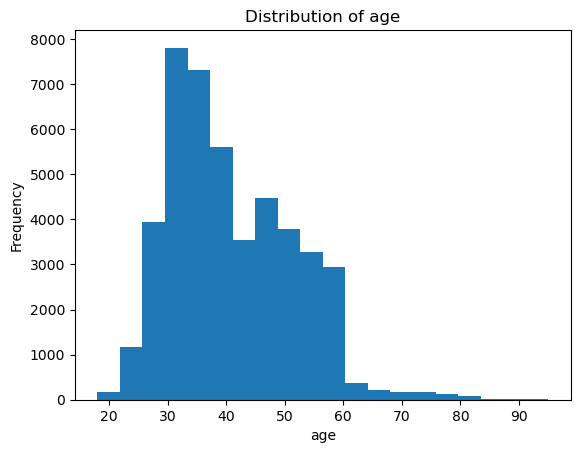

In [25]:
# Plot histogram for a age feature
plt.hist(data['age'], bins=20)  
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Distribution of age')
plt.show()


 The more frequency of the age is covered between 30 to 40

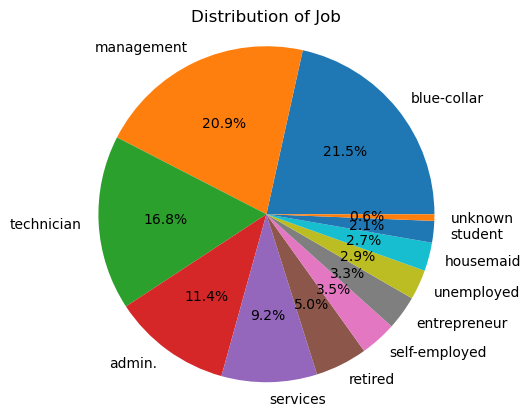

In [26]:
#plot pie chart for the job feature

job_counts = data['job'].value_counts()

plt.pie(job_counts.values, labels=job_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Job')
plt.axis('equal')  
plt.show()


In the distribution of job feature the managment has high percentage and unknown has low percentage

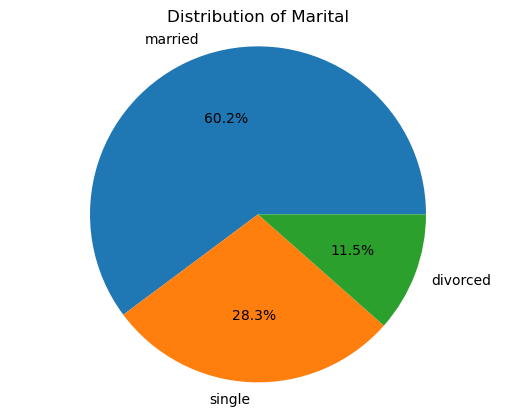

In [27]:
# plot pie chart for the marital feature

marital_counts = data['marital'].value_counts()

plt.pie(marital_counts.values, labels=marital_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Marital')
plt.axis('equal')  
plt.show()

 In this feature they focussed more percentage married people than any other

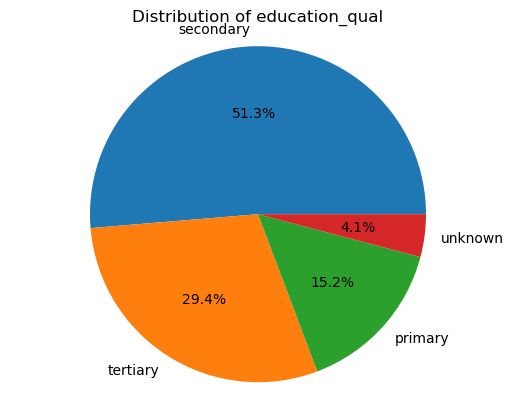

In [28]:
# plot pie chart for the education_qual	 feature

education_qual_counts = data['education_qual'].value_counts()

plt.pie(education_qual_counts.values, labels=education_qual_counts.index, autopct='%1.1f%%')
plt.title('Distribution of education_qual')
plt.axis('equal')  
plt.show()

In this feature the secondary education_qualification people has more percentage

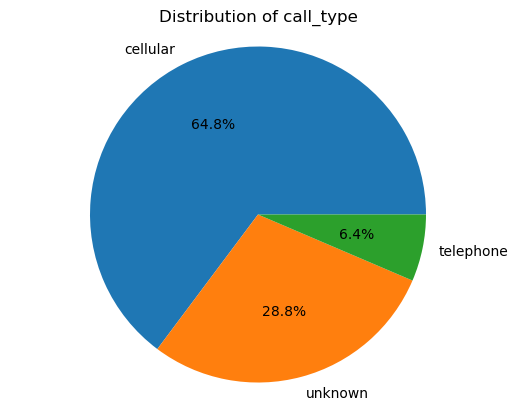

In [29]:
# plot pie chart for the call_type feature

call_type_counts = data['call_type'].value_counts()

plt.pie(call_type_counts.values, labels=call_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of call_type')
plt.axis('equal')  
plt.show()

In this feature the cellphone method has a 64.8% and a unknown method has a 28.8%

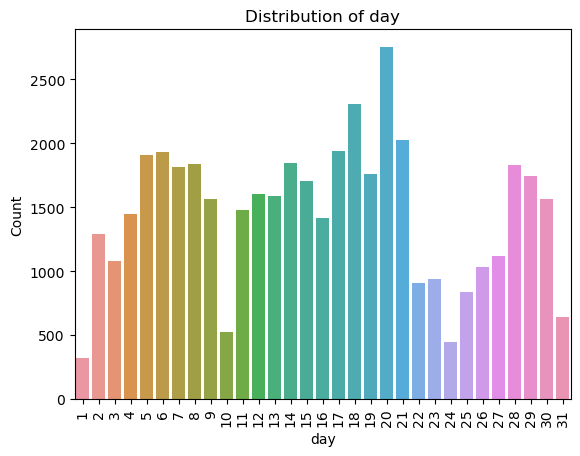

In [30]:
# plot histogram for the day feature

sns.countplot(data=data, x='day')
plt.xlabel('day')
plt.ylabel('Count')
plt.title('Distribution of day')
plt.xticks(rotation=90) 
plt.show()


The day from 12 to 21 has more percentage

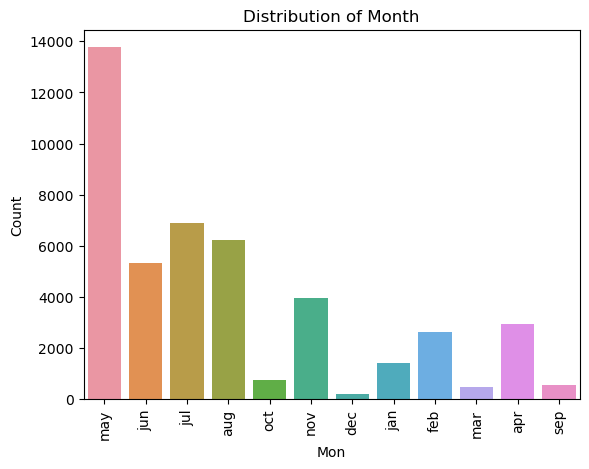

In [31]:
# plot histogram for the mon feature
sns.countplot(data=data, x='mon')
plt.xlabel('Mon')
plt.ylabel('Count')
plt.title('Distribution of Month')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In this feature the may month has more percentage

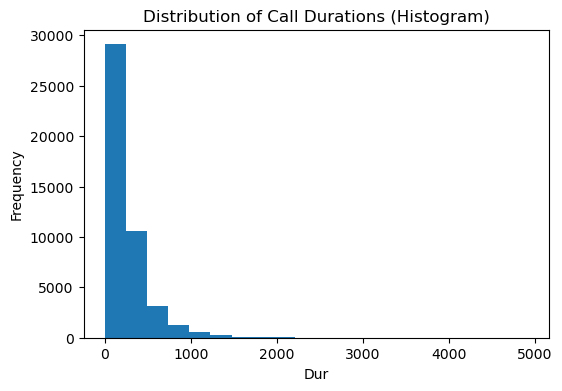

In [32]:
# plot histogram for dur feature
plt.figure(figsize=(6, 4))
plt.hist(data['dur'], bins=20) 
plt.xlabel('Dur')
plt.ylabel('Frequency')
plt.title('Distribution of Call Durations (Histogram)')
plt.show()

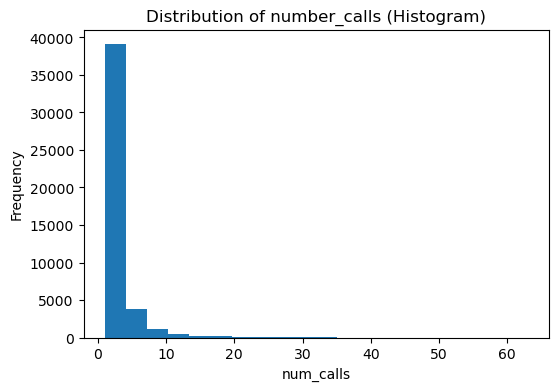

In [33]:
# plot histogram for the num_calls feature
plt.figure(figsize=(6, 4))
plt.hist(data['num_calls'], bins=20) 
plt.xlabel('num_calls')
plt.ylabel('Frequency')
plt.title('Distribution of number_calls (Histogram)')
plt.show()

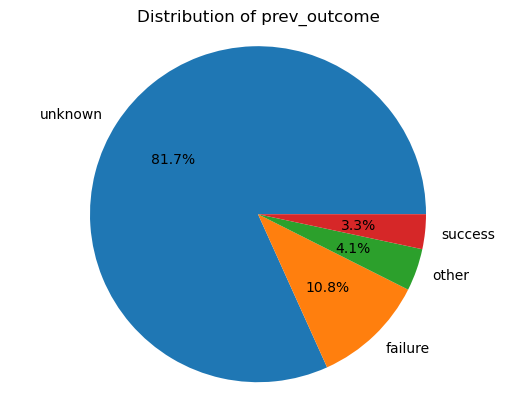

In [34]:
# plot pie chart for the prev_outcome feature

prev_outcome_counts = data['prev_outcome'].value_counts()

plt.pie(prev_outcome_counts.values, labels=prev_outcome_counts.index, autopct='%1.1f%%')
plt.title('Distribution of prev_outcome')
plt.axis('equal')  
plt.show()

In this feature the unknown value has more percentage than any other

## Features vs Target

## job

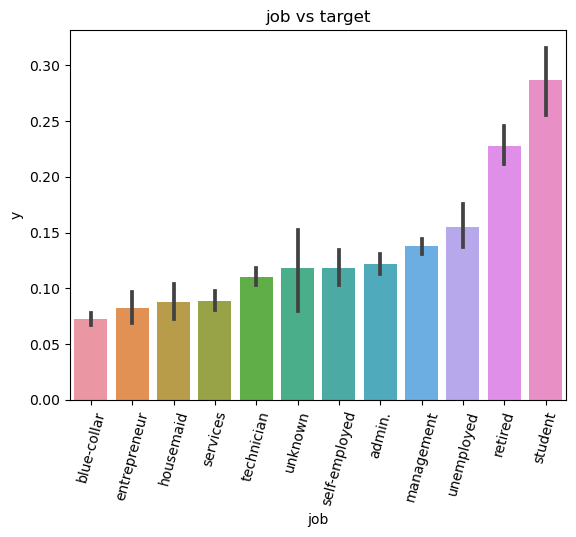

In [35]:
sns.barplot(x='job',y='y',data=data,order=data.groupby('job')['y'].mean().reset_index().sort_values('y')['job'])
plt.xticks(rotation=75)
plt.title('job vs target')
plt.show()
     


In the job feature vs target chart, the students are more targeted to subscribe the insurance and the second most
targeted people are the retired people.There are more columns if i do one-hot encoding and therefore the order of categories 
does not important and so, Here i go for label encoding

{'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'unknown':5','self-employed':6,'admin.':7,
 'management':8,'unemployed':9,'retired':10,'student':11}

## Maritial

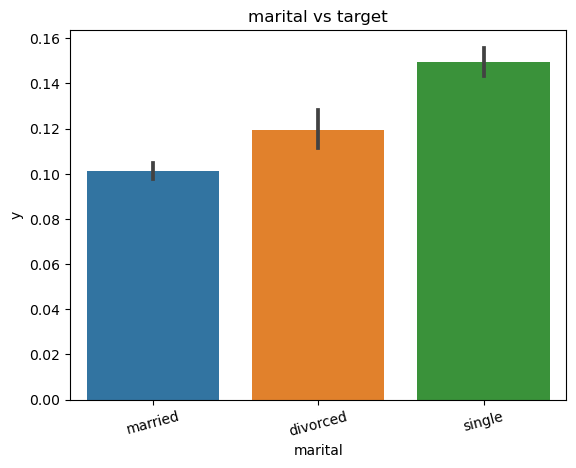

<Figure size 640x480 with 0 Axes>

In [36]:
sns.barplot(x='marital',y='y',data=data,order=data.groupby('marital')['y'].mean().reset_index().sort_values('y')['marital'])
plt.xticks(rotation=15)
plt.title('marital vs target')
plt.show()
plt.tight_layout()

In here the single people has most targeted to subscribe the insurance amongst the other
Here i go for One-hot encoding because there are only three categories

## education_qual

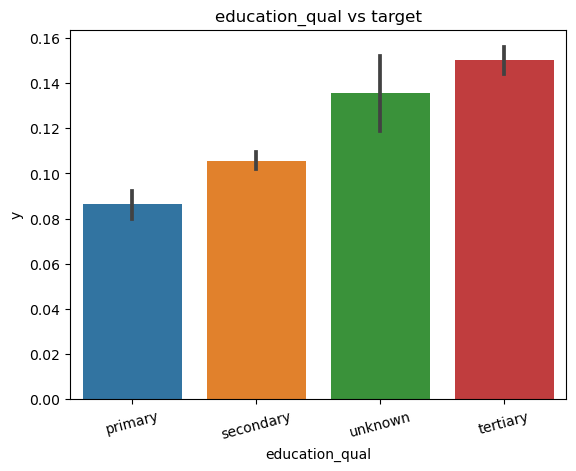

<Figure size 640x480 with 0 Axes>

In [37]:
sns.barplot(x='education_qual',y='y',data=data,order=data.groupby('education_qual')['y'].mean().reset_index().sort_values('y')['education_qual'])
plt.xticks(rotation=15)
plt.title('education_qual vs target')
plt.show()
plt.tight_layout()
     

In here the tertiary has more number of percentage than the other categories and so i go for label encoding
{'primary':0,'secondary':1,'unknown':2,'tertiary':3}

## call_type

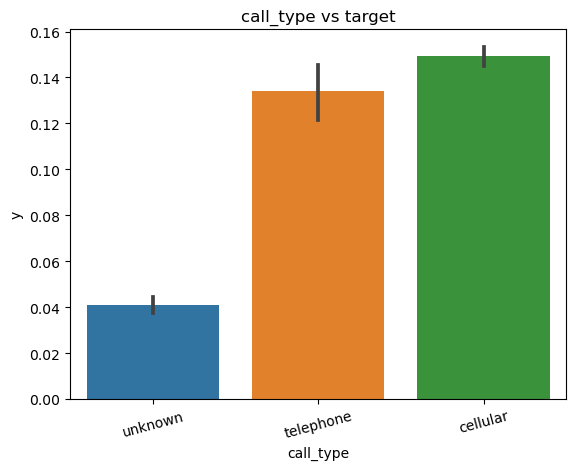

<Figure size 640x480 with 0 Axes>

In [38]:
sns.barplot(x='call_type',y='y',data=data,order=data.groupby('call_type')['y'].mean().reset_index().sort_values('y')['call_type'])
plt.xticks(rotation=15)
plt.title('call_type vs target')
plt.show()
plt.tight_layout()
     

In here the cellular has more percentage than the others, and so to avoid columns complexity i go for label encoding
{'unknown':0,'telephone':1,'cellular':2}

## day

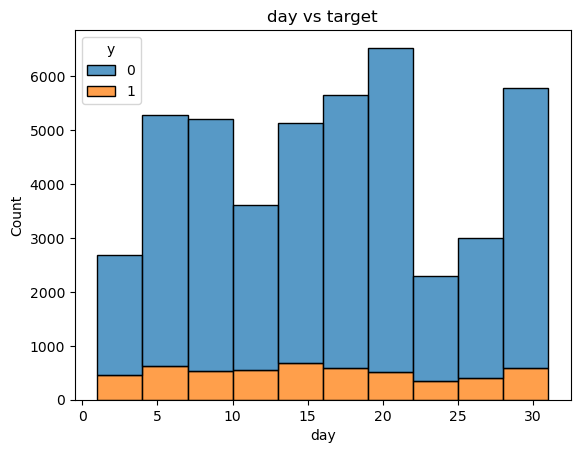

<Figure size 640x480 with 0 Axes>

In [39]:
sns.histplot(data=data, x="day", hue="y", multiple="stack",binwidth=3)
plt.title('day vs target')

plt.show()
plt.tight_layout()
     


## mon

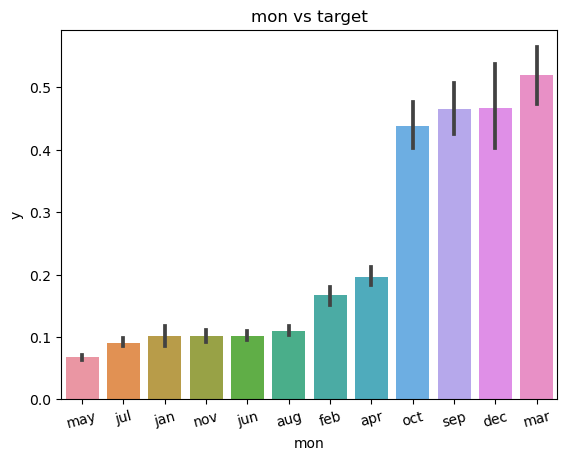

<Figure size 640x480 with 0 Axes>

In [40]:
sns.barplot(x='mon',y='y',data=data,order=data.groupby('mon')['y'].mean().reset_index().sort_values('y')['mon'])
plt.xticks(rotation=15)
plt.title('mon vs target')
plt.show()
plt.tight_layout()

By seeing the chart the march month has more percentage for the insurance month and the second most month is december

## dur

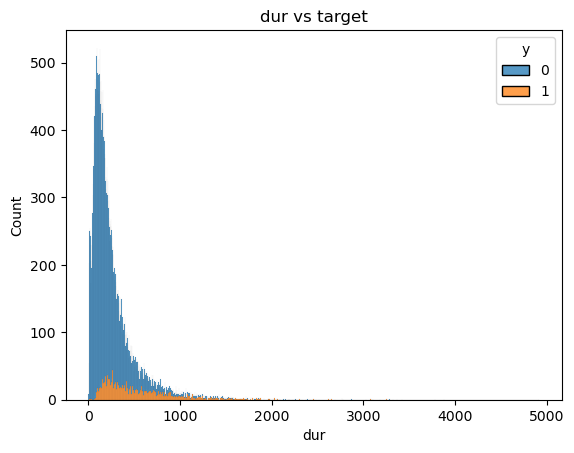

<Figure size 640x480 with 0 Axes>

In [41]:
sns.histplot(data=data, x="dur", hue="y", multiple="stack",binwidth=3)
plt.title('dur vs target')
plt.show()
plt.tight_layout()

By seeing a chart the interseted people by taking insurance they talk more and the dur of the call is also more

## num_calls

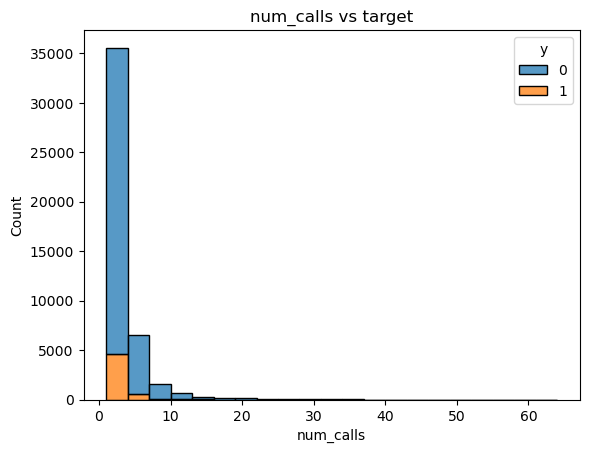

<Figure size 640x480 with 0 Axes>

In [42]:
sns.histplot(data=data, x="num_calls", hue="y", multiple="stack",binwidth=3)
plt.title('num_calls vs target')

plt.show()
plt.tight_layout()

## prev_outcome

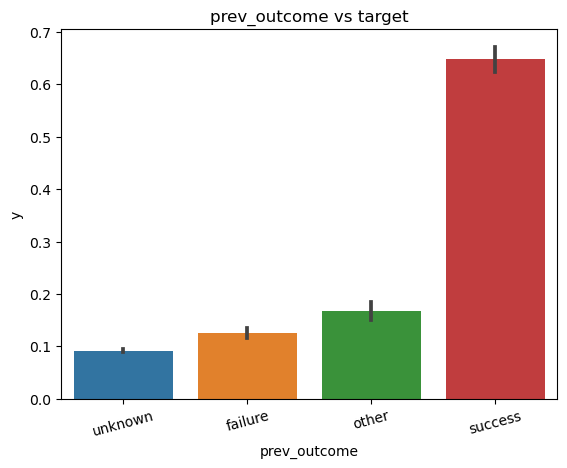

<Figure size 640x480 with 0 Axes>

In [43]:
sns.barplot(x='prev_outcome',y='y',data=data,order=data.groupby('prev_outcome')['y'].mean().reset_index().sort_values('y')['prev_outcome'])
plt.xticks(rotation=15)
plt.title('prev_outcome vs target')
plt.show()
plt.tight_layout()
     

In here the Success has more percentage than the others

# Encode
## Label Encoding

In [44]:
data['job']=data['job'].map({'management':8, 'technician':4, 'entrepreneur':1, 'blue-collar':0,
       'unknown':5, 'retired':10, 'admin.':7, 'services':3, 'self-employed':6,
       'unemployed':9, 'housemaid':2, 'student':11})
data['education_qual']=data['education_qual'].map({'tertiary':2, 'unknown':3, 'secondary':1, 'primary':0})
data['call_type']=data['call_type'].map({'unknown':1,'telephone':0,'cellular':2})
data['mon']=data['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})
data.head(8)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,8,married,2,1,5,0,261,1,unknown,0
1,44,4,single,1,1,5,0,151,1,unknown,0
2,33,1,married,1,1,5,0,76,1,unknown,0
3,47,0,married,3,1,5,0,92,1,unknown,0
4,33,5,single,3,1,5,0,198,1,unknown,0
5,35,8,married,2,1,5,0,139,1,unknown,0
6,28,8,single,2,1,5,0,217,1,unknown,0
7,42,1,divorced,2,1,5,0,380,1,unknown,0


## One-hot Encoding


In [45]:
data= pd.get_dummies(data, columns=['marital','prev_outcome'])
data.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,8,2,1,5,0,261,1,0,0,1,0,0,0,0,1
1,44,4,1,1,5,0,151,1,0,0,0,1,0,0,0,1
2,33,1,1,1,5,0,76,1,0,0,1,0,0,0,0,1
3,47,0,3,1,5,0,92,1,0,0,1,0,0,0,0,1
4,33,5,3,1,5,0,198,1,0,0,0,1,0,0,0,1


## Target and Features

In [46]:
X = data[['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']].values
y = data['y'].values
     

## Splitting the data

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [48]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((36164, 15), (9041, 15), (36164,), (9041,))

In [49]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn



## Balance the data by SMOTEENN

In [50]:
import imblearn

In [51]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
X_train, y_train = smt.fit_resample(X_train, y_train)


In [52]:
print(len(X_train))
print(len(y_train))

53903
53903


## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_train,y_train)
y_pred = lr.predict(X_test)

print("Training accuracy:", lr.score(X_train, y_train))
print("Testing accuracy:", lr.score(X_test, y_test))
print("F1 score:", f1_score(y_test, y_pred))


Training accuracy: 0.9232139213030814
Testing accuracy: 0.813516203959739
F1 score: 0.5081680280046674


In [54]:
print("Precision: {0}".format(precision_score(y_test,lr.predict(X_test))))


Precision: 0.3701657458563536


In [55]:
print("Recall: ",round(recall_score(y_test, lr.predict(X_test)),2))


Recall:  0.81


## Decision Tree

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

for depth in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 40, 60]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)

    train_accuracy = accuracy_score(y_train, dt.predict(X_train))

    dt = DecisionTreeClassifier(max_depth=depth)
    val_accuracy = cross_val_score(dt, X_train, y_train, cv=10)

    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)

    print("Depth:", depth, "Training Accuracy:", train_accuracy, "Cross val score:", np.mean(val_accuracy))


   


Depth: 1 Training Accuracy: 0.7863755264085487 Cross val score: 0.7863754577563307
Depth: 2 Training Accuracy: 0.8006789974583975 Cross val score: 0.8006793222676839
Depth: 3 Training Accuracy: 0.8658516223586813 Cross val score: 0.8657973451939587
Depth: 4 Training Accuracy: 0.8992078362985363 Cross val score: 0.9012123999698529
Depth: 5 Training Accuracy: 0.9128805446821142 Cross val score: 0.9119542740959388
Depth: 6 Training Accuracy: 0.9240116505574829 Cross val score: 0.9218609177874619
Depth: 7 Training Accuracy: 0.9316921136114873 Cross val score: 0.9275193624776262
Depth: 8 Training Accuracy: 0.9429530823887353 Cross val score: 0.9356081271988739
Depth: 9 Training Accuracy: 0.9505964417564885 Cross val score: 0.9399862376275445
Depth: 10 Training Accuracy: 0.9595013264567834 Cross val score: 0.9443274659993
Depth: 20 Training Accuracy: 0.999517652078734 Cross val score: 0.9553659039373326
Depth: 40 Training Accuracy: 1.0 Cross val score: 0.9555142718796427
Depth: 60 Training A

In [59]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier(max_depth=40) 
dt.fit(X_train,y_train) 
y_pred = dt.predict(X_test)
print("Training accuracy:", dt.score(X_train, y_train))
print("Testing accuracy:", dt.score(X_test, y_test))
print("F1 score:", f1_score(y_test, y_pred))



Training accuracy: 1.0
Testing accuracy: 0.83829222431147
F1 score: 0.5149303251493033


# K-NN

In [61]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(X_train,y_train)
  print("K value :", i, "Train score :" ,knn.score(X_train,y_train), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_train, y_train, cv=10)))
     

K value : 1 Train score : 1.0 Cross Value Accuracy : 0.9954733220247173
K value : 2 Train score : 0.9998330334118695 Cross Value Accuracy : 0.9956774277475446
K value : 3 Train score : 0.9970131532567761 Cross Value Accuracy : 0.9877186845801204
K value : 4 Train score : 0.997161568001781 Cross Value Accuracy : 0.9884421985519053
K value : 5 Train score : 0.9917073261228503 Cross Value Accuracy : 0.9783871249719089
K value : 6 Train score : 0.991967051926609 Cross Value Accuracy : 0.9795002596576647
K value : 7 Train score : 0.9840083112257203 Cross Value Accuracy : 0.9693709780163393
K value : 8 Train score : 0.9844350036176094 Cross Value Accuracy : 0.9712076473226008
K value : 9 Train score : 0.9763464000148415 Cross Value Accuracy : 0.9613566071949091
K value : 10 Train score : 0.9771626811123685 Cross Value Accuracy : 0.9624141142266589
K value : 20 Train score : 0.9499656790902176 Cross Value Accuracy : 0.9385007961802619
K value : 30 Train score : 0.9334916423946719 Cross Value 

In [64]:
knn= KNeighborsClassifier(2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Training accuracy:", knn.score(X_train, y_train))
print("Testing accuracy:", knn.score(X_test, y_test))
print("F1 score:", f1_score(y_test, y_pred))

Training accuracy: 0.9998330334118695
Testing accuracy: 0.7858643955314678
F1 score: 0.4161640530759952


## XG-Boost

In [66]:
!pip install xgboost


     ---------------------------------------- 70.9/70.9 MB 3.4 MB/s eta 0:00:00


In [68]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train,y_train)
  model.score(X_test,y_test)
  print("Learning rate : ", lr, "Train score :" ,model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))
     

Learning rate :  0.01 Train score : 0.9379255329016938  Cross-Val score :  0.9324171048497307
Learning rate :  0.02 Train score : 0.9461996549357179  Cross-Val score :  0.9402274146872287
Learning rate :  0.03 Train score : 0.9516724486577741  Cross-Val score :  0.9456817157985775
Learning rate :  0.04 Train score : 0.9574420718698403  Cross-Val score :  0.9498929948870325
Learning rate :  0.05 Train score : 0.960057881750552  Cross-Val score :  0.953399336969573
Learning rate :  0.1 Train score : 0.9699274622933789  Cross-Val score :  0.9611354766017299
Learning rate :  0.11 Train score : 0.9722278908409551  Cross-Val score :  0.9617105021803329
Learning rate :  0.12 Train score : 0.9728215498209747  Cross-Val score :  0.9621372320871486
Learning rate :  0.13 Train score : 0.9744726638591544  Cross-Val score :  0.9628051734681833
Learning rate :  0.14 Train score : 0.9745097675454056  Cross-Val score :  0.9636399255407125
Learning rate :  0.15 Train score : 0.9759382594660779  Cross-V

In [69]:
xg = xgb.XGBClassifier(learning_rate = 0.7, n_estimators=100, verbosity = 0) 
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
print("Training accuracy:", xg.score(X_train, y_train))
print("Testing accuracy:", xg.score(X_test, y_test))
print("F1 score:", f1_score(y_test, y_pred))

Training accuracy: 0.9971986716880322
Testing accuracy: 0.863068244663201
F1 score: 0.5811907983761839


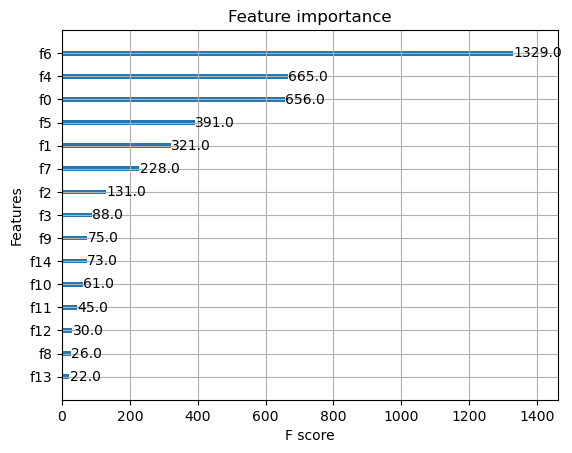

In [70]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()

## Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(max_depth = 2,n_estimators=100,max_features="sqrt")
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)

In [81]:
for depth in [1,2,3,4,5,6,7,8,9,10]:
    classifier = RandomForestClassifier(max_depth = 2,n_estimators=100,max_features="sqrt") 
    classifier.fit(X_train, y_train) 
    classifier = RandomForestClassifier(max_depth = 2,n_estimators=100,max_features="sqrt") 
    valAccuracy = cross_val_score(random, X_train, y_train, cv=10)
    
    print("Depth :",depth, "Training Accuracy :",train_accuracy,"Cross val score :",np.mean(valAccuracy))

Depth : 1 Training Accuracy : 1.0 Cross val score : 0.9256452019771839
Depth : 2 Training Accuracy : 1.0 Cross val score : 0.9237715026315074
Depth : 3 Training Accuracy : 1.0 Cross val score : 0.9244578936446335
Depth : 4 Training Accuracy : 1.0 Cross val score : 0.9246248110211859
Depth : 5 Training Accuracy : 1.0 Cross val score : 0.9240496615502577
Depth : 6 Training Accuracy : 1.0 Cross val score : 0.924977387929928
Depth : 7 Training Accuracy : 1.0 Cross val score : 0.9253112502146607
Depth : 8 Training Accuracy : 1.0 Cross val score : 0.9242352625777382
Depth : 9 Training Accuracy : 1.0 Cross val score : 0.9245692969351449
Depth : 10 Training Accuracy : 1.0 Cross val score : 0.9257936180998427


In [84]:
random = RandomForestClassifier(max_depth = 7,n_estimators=100,max_features="sqrt") 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Training accuracy:", classifier.score(X_train, y_train))
print("Testing accuracy:", classifier.score(X_test, y_test))
print("F1 score:", f1_score(y_test, y_pred))

Training accuracy: 0.8698773723169397
Testing accuracy: 0.6653025107842053
F1 score: 0.3911468812877264


## Feature Selection


In [85]:
importance = classifier.feature_importances_ 
feature_importances = list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'marital_divorced', 'marital_married', 'marital_single', 'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success', 'prev_outcome_unknown'])) 
feature_importances = sorted(feature_importances, key = lambda x: x[0], reverse = True) 
feature_importances

[(0.3525653854661446, 'dur'),
 (0.2145611576530953, 'prev_outcome_unknown'),
 (0.10479480241037784, 'mon'),
 (0.09266071549947465, 'marital_married'),
 (0.06582008549518255, 'num_calls'),
 (0.04168875133815045, 'job'),
 (0.0379487990555949, 'age'),
 (0.03655508431213054, 'marital_divorced'),
 (0.011619243830727434, 'prev_outcome_success'),
 (0.01077415423571981, 'call_type'),
 (0.010768545195997384, 'prev_outcome_failure'),
 (0.006625557205443786, 'marital_single'),
 (0.006291954506086037, 'day'),
 (0.005955580447239408, 'education_qual'),
 (0.0013701833486355053, 'prev_outcome_other')]